# Pytolemaic - A toolbox for Model Quality

* [Reference](https://towardsdatascience.com/pytolemaic-package-for-model-quality-analysis-2b7bea751cfd)
* [Github](https://github.com/Broundal/Pytolemaic)

## Model analysis techniques

1. Feature sensitivity
1. Scoring and confidence intervals
1. Covariance shift measurements

## Model's prediction analysis

1. Prediction's uncertainty
1. Lime explanations

## Table of Contents

1. [Getting Started](#gettingstarted)
1. [Feature Selection](#FeatureSelection)

## Getting Started

In [8]:
import numpy as np
import sklearn.datasets
import sklearn.model_selection

data = sklearn.datasets.load_wine(return_X_y=False)

x = data['data']
y = data['target']

feature_names = data['feature_names']
labels = data['target_names']

train_inds, test_inds = sklearn.model_selection.train_test_split(
    np.arange(len(data['data'])), test_size=0.3)

xtrain, ytrain = x[train_inds], y[train_inds]
xtest, ytest = x[test_inds], y[test_inds]

from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
estimator.fit(xtrain, ytrain)

from pytolemaic.pytrust import PyTrust
from pytolemaic.utils.dmd import DMD

pytrust = PyTrust(
    model=estimator,
    xtrain=xtrain, ytrain=ytrain,
    xtest=xtest, ytest=ytest,
    columns_meta={DMD.FEATURE_NAMES: feature_names},
    labels=labels,
    splitter='stratified',
    metric='recall')

In [12]:
pytrust.sensitivity_report().to_dict()

{'shuffle_report': {'method': 'shuffled',
  'sensitivities': {'alcohol': 0.0515,
   'malic_acid': 0.0,
   'ash': 0.0,
   'alcalinity_of_ash': 0.1588,
   'magnesium': 0.07725,
   'total_phenols': 0.0,
   'flavanoids': 0.06009,
   'nonflavanoid_phenols': 0.0,
   'proanthocyanins': 0.0,
   'color_intensity': 0.27039,
   'hue': 0.0,
   'od280/od315_of_diluted_wines': 0.0,
   'proline': 0.38197},
  'stats': {'n_features': 13, 'n_low': 7, 'n_very_low': 7, 'n_zero': 7}},
 'missing_report': None,
 'vulnerability_report': {'too_many_features': 0.0,
  'imputation': 0,
  'leakage': 0.04526613752481193}}

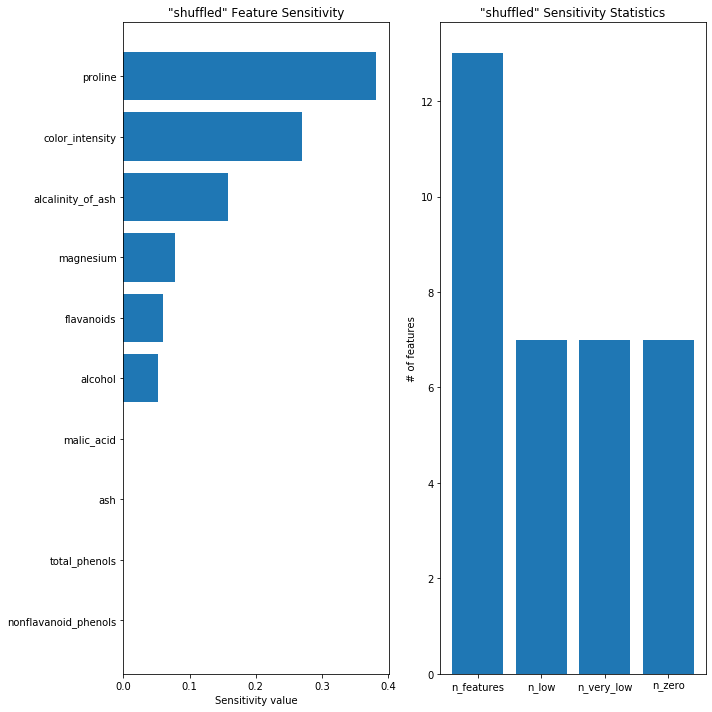

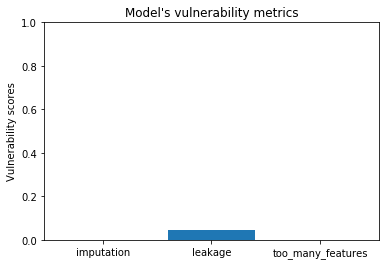

In [13]:
pytrust.sensitivity_report().plot()

## Feature Selection